<a href="https://colab.research.google.com/github/nikhil2020/Data_Science_Capstone_Project/blob/master/DSCapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
pwd

'/content'

In [3]:
import os 
os.chdir("/content/drive/My Drive/Datasets/DS_Capstone_Project")

## ***Importing the ML Libraries***

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
df = pd.read_csv('train.csv')

In [9]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,F,2015-10-20T08:33:56Z,2015-10-23T00:00:00Z,Friday,No-Show,0,0,0,0,1,0,0,0,-3
1,56,F,2014-02-03T10:05:26Z,2014-02-20T00:00:00Z,Thursday,No-Show,1,0,1,0,0,0,0,1,-17
2,27,F,2014-04-29T07:57:32Z,2014-05-20T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-21
3,24,M,2014-04-02T13:53:37Z,2014-05-06T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-34
4,48,F,2014-01-07T10:07:17Z,2014-01-30T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-23


# **Descriptive Statistics**

In [10]:
 df.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'ApointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alcoolism', 'HiperTension',
       'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')

In [11]:
df.shape

(210000, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Age                      210000 non-null  int64 
 1   Gender                   210000 non-null  object
 2   AppointmentRegistration  210000 non-null  object
 3   ApointmentData           210000 non-null  object
 4   DayOfTheWeek             210000 non-null  object
 5   Status                   210000 non-null  object
 6   Diabetes                 210000 non-null  int64 
 7   Alcoolism                210000 non-null  int64 
 8   HiperTension             210000 non-null  int64 
 9   Handcap                  210000 non-null  int64 
 10  Smokes                   210000 non-null  int64 
 11  Scholarship              210000 non-null  int64 
 12  Tuberculosis             210000 non-null  int64 
 13  Sms_Reminder             210000 non-null  int64 
 14  AwaitingTime        

In [13]:
df.describe()

,Age,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000
mean,37.761824,0.077290,0.024676,0.214862,0.020471,0.052033,0.097738,0.000429,0.574238,-13.833538
std,22.794334,0.267052,0.155137,0.410727,0.155854,0.222095,0.296961,0.020698,0.499776,15.685272
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-398.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-8.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.000000
max,113.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,-1.000000


In [14]:
df.nunique()

Age                           107
Gender                          2
AppointmentRegistration    207711
ApointmentData                533
DayOfTheWeek                    7
Status                          2
Diabetes                        2
Alcoolism                       2
HiperTension                    2
Handcap                         5
Smokes                          2
Scholarship                     2
Tuberculosis                    2
Sms_Reminder                    3
AwaitingTime                  205
dtype: int64

In [15]:
 df.dtypes

Age                         int64
Gender                     object
AppointmentRegistration    object
ApointmentData             object
DayOfTheWeek               object
Status                     object
Diabetes                    int64
Alcoolism                   int64
HiperTension                int64
Handcap                     int64
Smokes                      int64
Scholarship                 int64
Tuberculosis                int64
Sms_Reminder                int64
AwaitingTime                int64
dtype: object

## ***Checking for null values in the dataset***

In [16]:
 df.isnull().sum(axis =0)

Age                        0
Gender                     0
AppointmentRegistration    0
ApointmentData             0
DayOfTheWeek               0
Status                     0
Diabetes                   0
Alcoolism                  0
HiperTension               0
Handcap                    0
Smokes                     0
Scholarship                0
Tuberculosis               0
Sms_Reminder               0
AwaitingTime               0
dtype: int64

In [17]:
 df.Handcap.value_counts()

0    206096
1      3552
2       316
3        29
4         7
Name: Handcap, dtype: int64

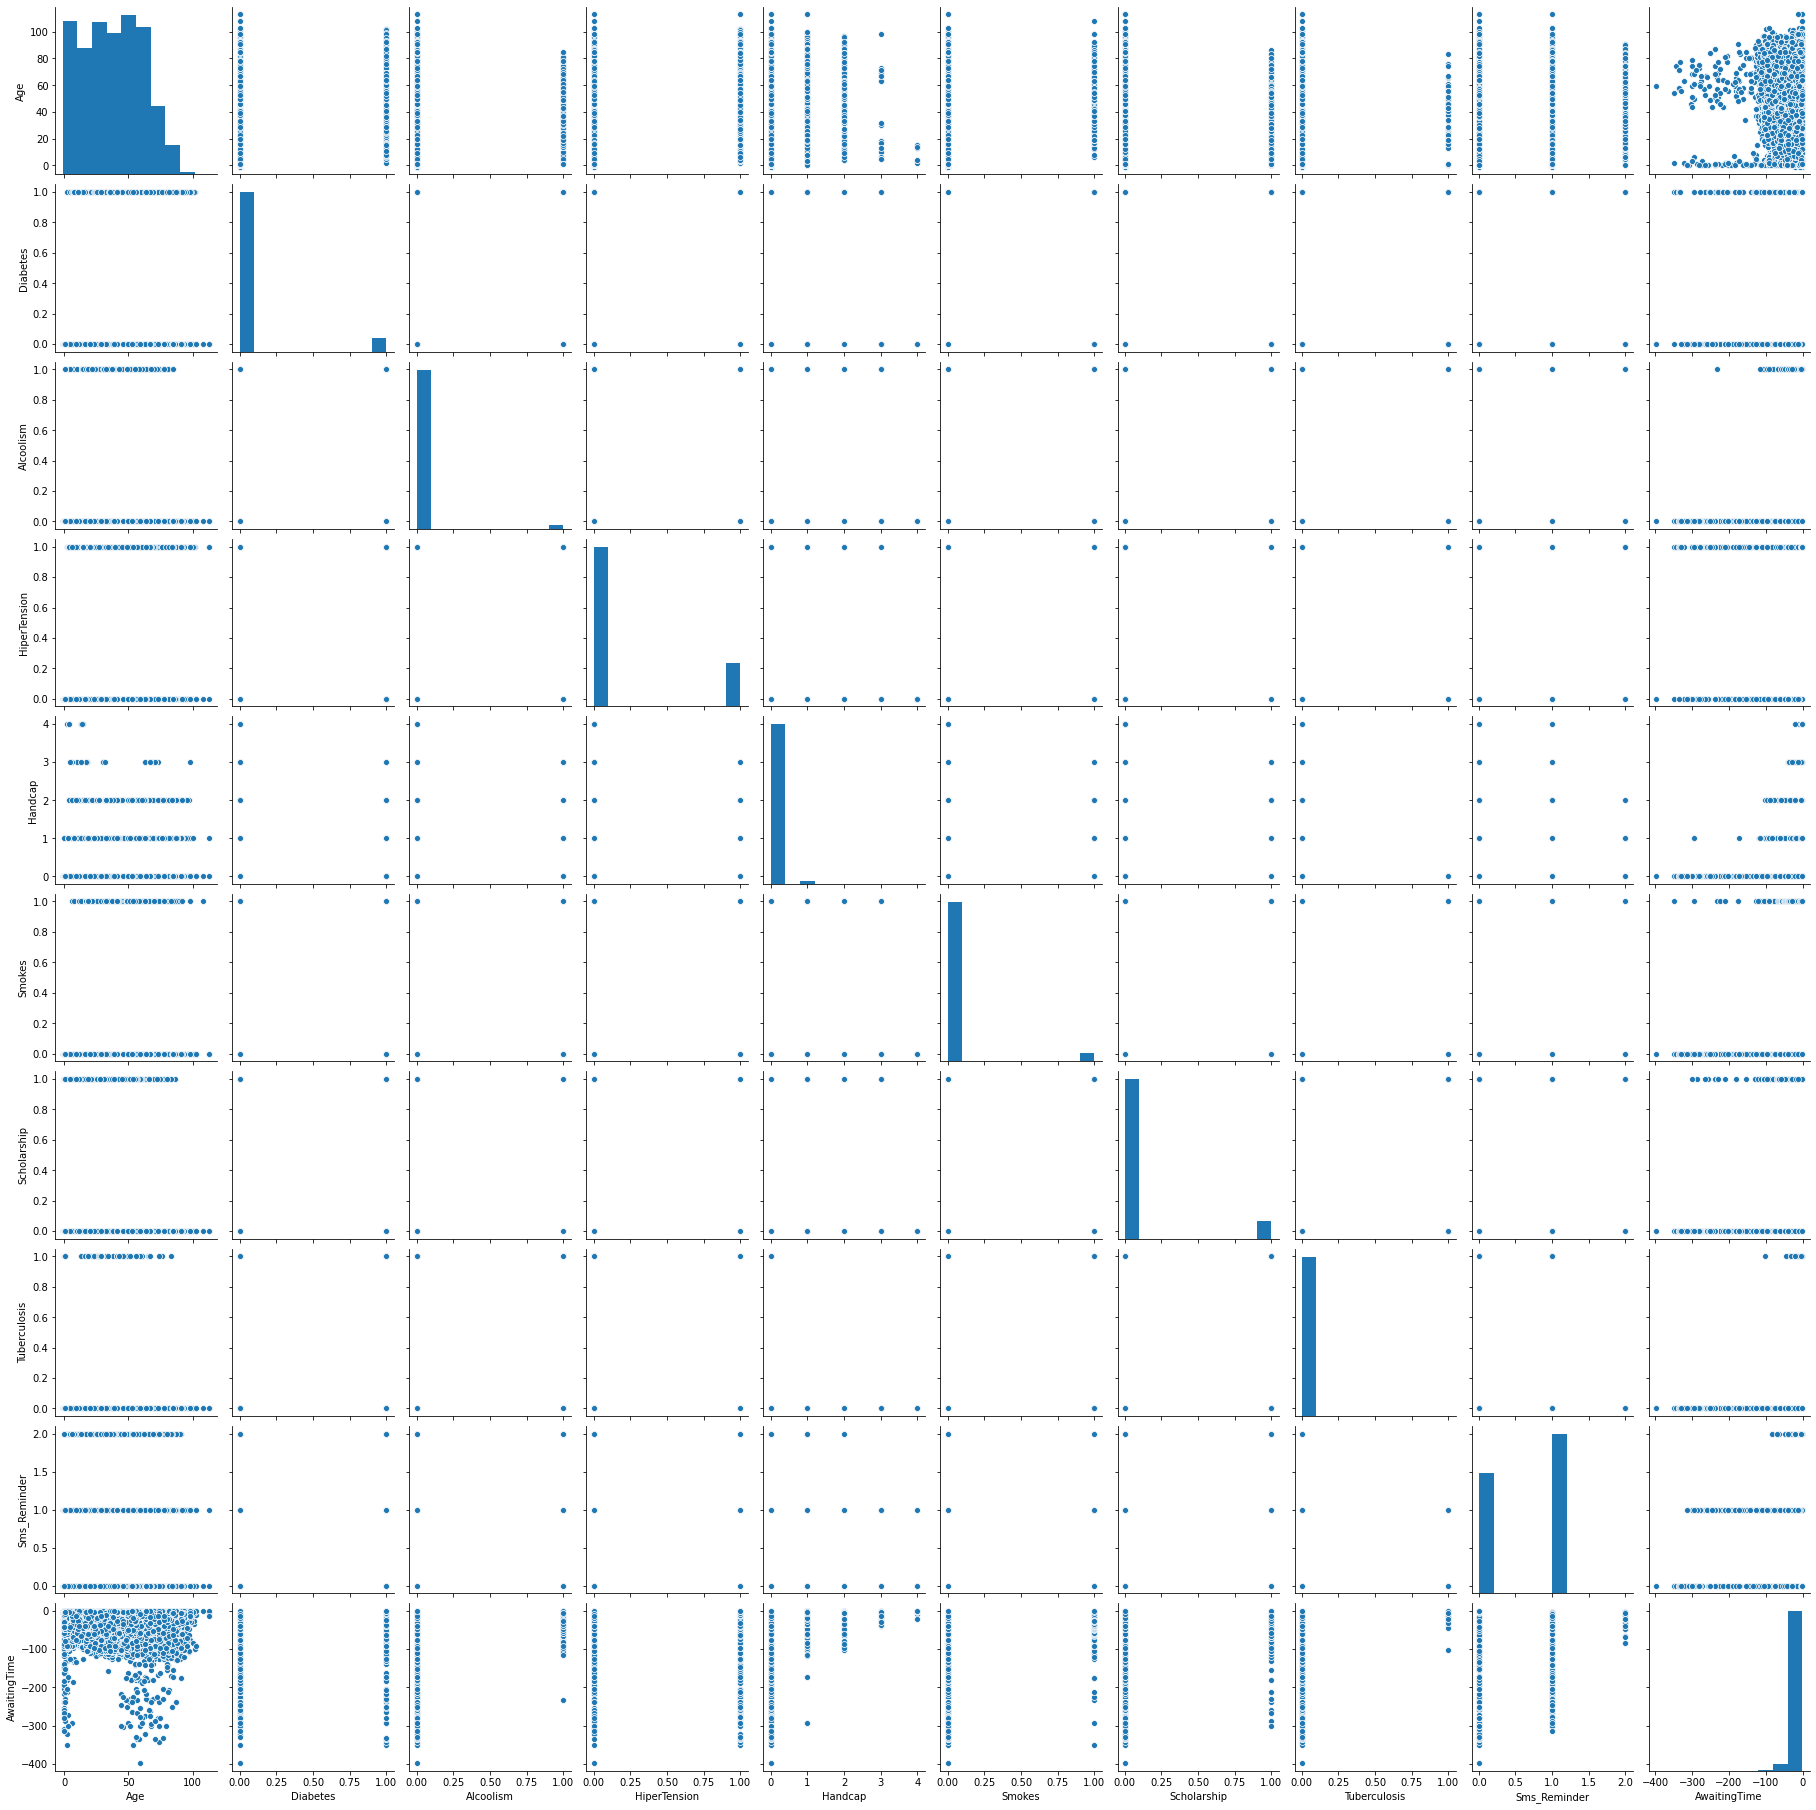

In [18]:
 sns.pairplot(df)

*Converting the date variables into datatime datatypes*

In [19]:
 df['AppointmentRegistration'] = pd.to_datetime(df['AppointmentRegistration'])

In [20]:
 df['AppointmentData'] = pd.to_datetime(df['ApointmentData'])

In [21]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   Age                      210000 non-null  int64              
 1   Gender                   210000 non-null  object             
 2   AppointmentRegistration  210000 non-null  datetime64[ns, UTC]
 3   ApointmentData           210000 non-null  object             
 4   DayOfTheWeek             210000 non-null  object             
 5   Status                   210000 non-null  object             
 6   Diabetes                 210000 non-null  int64              
 7   Alcoolism                210000 non-null  int64              
 8   HiperTension             210000 non-null  int64              
 9   Handcap                  210000 non-null  int64              
 10  Smokes                   210000 non-null  int64              
 11  Scholarship  

In [22]:
 df['AwaitingTime'] = df['AwaitingTime'].abs()

In [23]:
 df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,AppointmentData
0,38,F,2015-10-20 08:33:56+00:00,2015-10-23T00:00:00Z,Friday,No-Show,0,0,0,0,1,0,0,0,3,2015-10-23 00:00:00+00:00
1,56,F,2014-02-03 10:05:26+00:00,2014-02-20T00:00:00Z,Thursday,No-Show,1,0,1,0,0,0,0,1,17,2014-02-20 00:00:00+00:00
2,27,F,2014-04-29 07:57:32+00:00,2014-05-20T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,21,2014-05-20 00:00:00+00:00
3,24,M,2014-04-02 13:53:37+00:00,2014-05-06T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,34,2014-05-06 00:00:00+00:00
4,48,F,2014-01-07 10:07:17+00:00,2014-01-30T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,23,2014-01-30 00:00:00+00:00


In [24]:
 df.drop(['ApointmentData'], axis = 1, inplace = True)

In [25]:
 df['HourOftheDay'] = df['AppointmentRegistration'].dt.strftime('%H')

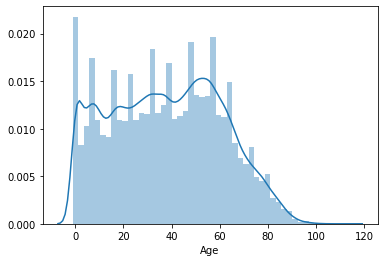

In [26]:
 sns.distplot(df['Age'])

In [27]:
 df.Age.value_counts()

 0      7252
 56     3317
 51     3275
 54     3250
 52     3239
        ... 
 102       4
 103       3
 113       3
-1         3
 108       1
Name: Age, Length: 107, dtype: int64

In [28]:
 bar_df = df[df['Status']=='Show-Up']

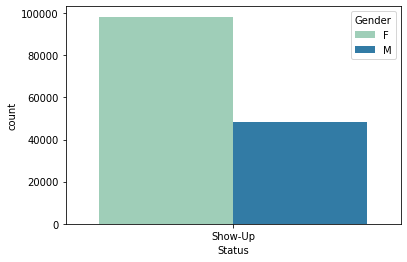

In [29]:
 sns.countplot(x='Status',hue ='Gender',data = bar_df,palette = 'YlGnBu')

*Above graph state that Female patient are more likely show up on appointment date alloted by doctor as compare to the male patient*

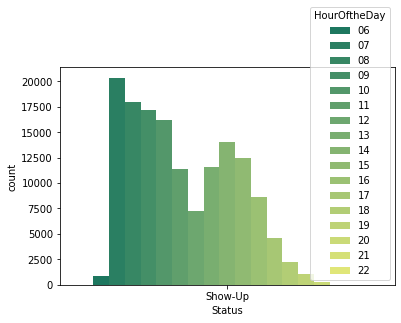

In [30]:
 sns.countplot(x='Status',hue ='HourOftheDay',data = bar_df,palette ='summer')

*Above graph state that most patients likely to show up in the morning schedule*

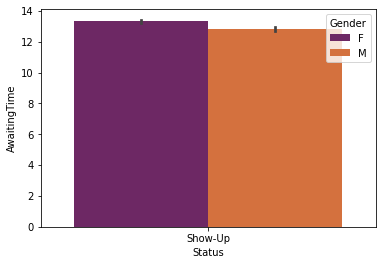

In [33]:
sns.barplot(x='Status',y='AwaitingTime',hue = 'Gender',data=bar_df,palette = 'inferno')

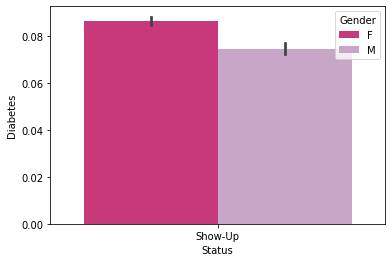

In [34]:
 sns.barplot(x='Status',y='Diabetes',hue = 'Gender',data = bar_df,palette = 'PuRd_r')

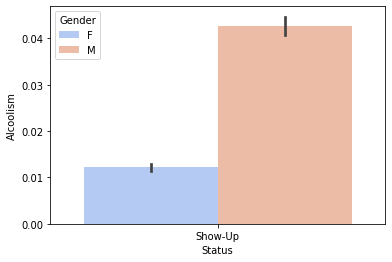

In [36]:
sns.barplot(x='Status',y='Alcoolism',hue ='Gender',data = bar_df,palette = 'coolwarm')

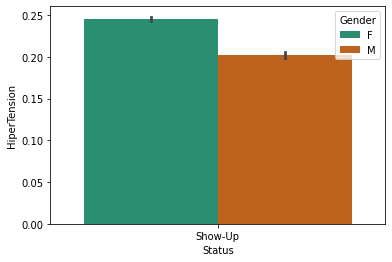

In [37]:
 sns.barplot(x='Status',y='HiperTension',hue = 'Gender',data = bar_df,palette ='Dark2')

In [38]:
 df.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'DayOfTheWeek', 'Status',
       'Diabetes', 'Alcoolism', 'HiperTension', 'Handcap', 'Smokes',
       'Scholarship', 'Tuberculosis', 'Sms_Reminder', 'AwaitingTime',
       'AppointmentData', 'HourOftheDay'],
      dtype='object')

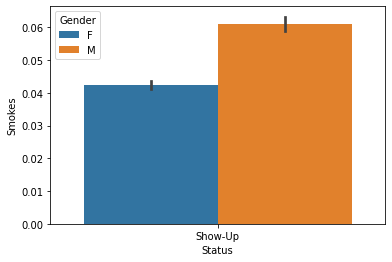

In [39]:
 sns.barplot(x='Status',y='Smokes',hue = 'Gender',data = bar_df)

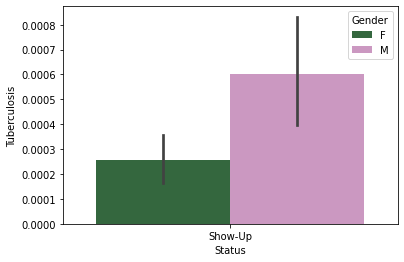

In [40]:
 sns.barplot(x='Status',y='Tuberculosis',hue = 'Gender',data = bar_df,palette =
"cubehelix")

Create separate bar graphs to show the probability of showing up for male and female, day of the week and sms reminder. Describe your interpretation.

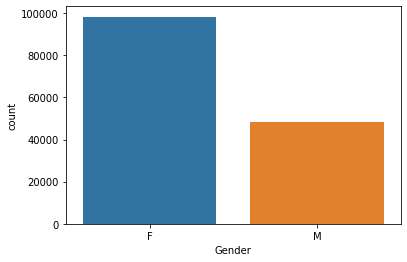

In [41]:
 sns.countplot(x = 'Gender', data = bar_df)

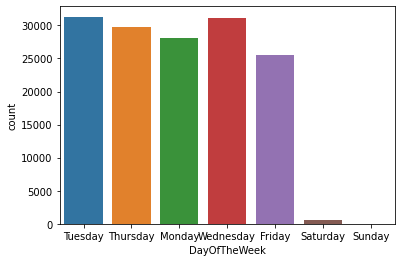

In [42]:
 sns.countplot(x = 'DayOfTheWeek',data = bar_df)

*Above DayoftheWeek graph stated that the patient are most likely to show up on given appointment date from Mon to Fri but unlikely on sat-sun most patients didn't show up.*

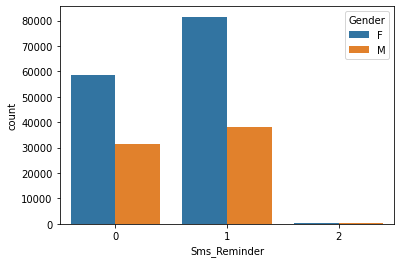

In [43]:
 sns.countplot(x = 'Sms_Reminder',hue = 'Gender',data = df)

*Above graphs of Sms Reminder suggest that the reminder sms to female patient has very high probability to show up on the appointment date*


## ***Creating dummies***

In [44]:
 df_dummy = pd.get_dummies(df, columns=["Gender"])

In [45]:
 df_dummy.head()

,Age,AppointmentRegistration,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,AppointmentData,HourOftheDay,Gender_F,Gender_M
0,38,2015-10-20 08:33:56+00:00,Friday,No-Show,0,0,0,0,1,0,0,0,3,2015-10-23 00:00:00+00:00,08,1,0
1,56,2014-02-03 10:05:26+00:00,Thursday,No-Show,1,0,1,0,0,0,0,1,17,2014-02-20 00:00:00+00:00,10,1,0
2,27,2014-04-29 07:57:32+00:00,Tuesday,Show-Up,0,0,0,0,0,0,0,0,21,2014-05-20 00:00:00+00:00,07,1,0
3,24,2014-04-02 13:53:37+00:00,Tuesday,Show-Up,0,0,0,0,0,0,0,0,34,2014-05-06 00:00:00+00:00,13,0,1
4,48,2014-01-07 10:07:17+00:00,Thursday,Show-Up,0,0,0,0,0,0,0,1,23,2014-01-30 00:00:00+00:00,10,1,0


### *Identity the outliers in Age variable*

In [50]:
def out_std(s, nstd=3.0, return_thresholds=False):
    
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean to consider an outlier
        :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array
        :type return_thresholds: ``bool``
    """
    data_mean, data_std = s.mean(), s.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [True if x < lower or x > upper else False for x in s]
    return lower, upper, [True if x < lower or x > upper else False for x in s]

In [53]:
def out_iqr(s, k=1.5, return_thresholds=False):
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds: 
      return lower, upper
    else: # identify outliers
      return [True if x < lower or x > upper else False for x in s]

In [54]:
# outlier_mask is a boolean list identifies the indices of the outliers
lthresh, uthresh, outlier_mask = out_std(df['Age'], nstd=2.5)
# first 10 elements
print(lthresh, uthresh)
outlier_mask

ValueError: ignored

In [55]:
# outlier_mask is a boolean list identifies the indices of the outliers
lthresh, uthresh, outlier_mask = out_std(df['Age'], nstd=2.5)
# first 10 elements
print(lthresh, uthresh)
outlier_mask

ValueError: ignored